### importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
df=pd.read_csv('C:\\Users\\Aymen\\Desktop\\Datasets\\crimes.csv' , sep=";")
df.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [10]:
df.head(10)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,Colorado,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,Connecticut,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,Delaware,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,Florida,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,Georgia,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


In [12]:
df.shape

(50, 8)

In [13]:
df.describe()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


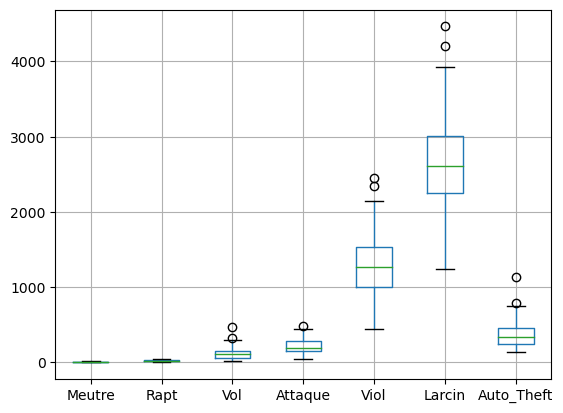

In [14]:
df.boxplot()
plt.show()

In [15]:
df[df['Viol']>2300]

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
27,Nevada,15.8,49.1,323.1,355.0,2453.1,4212.6,559.2


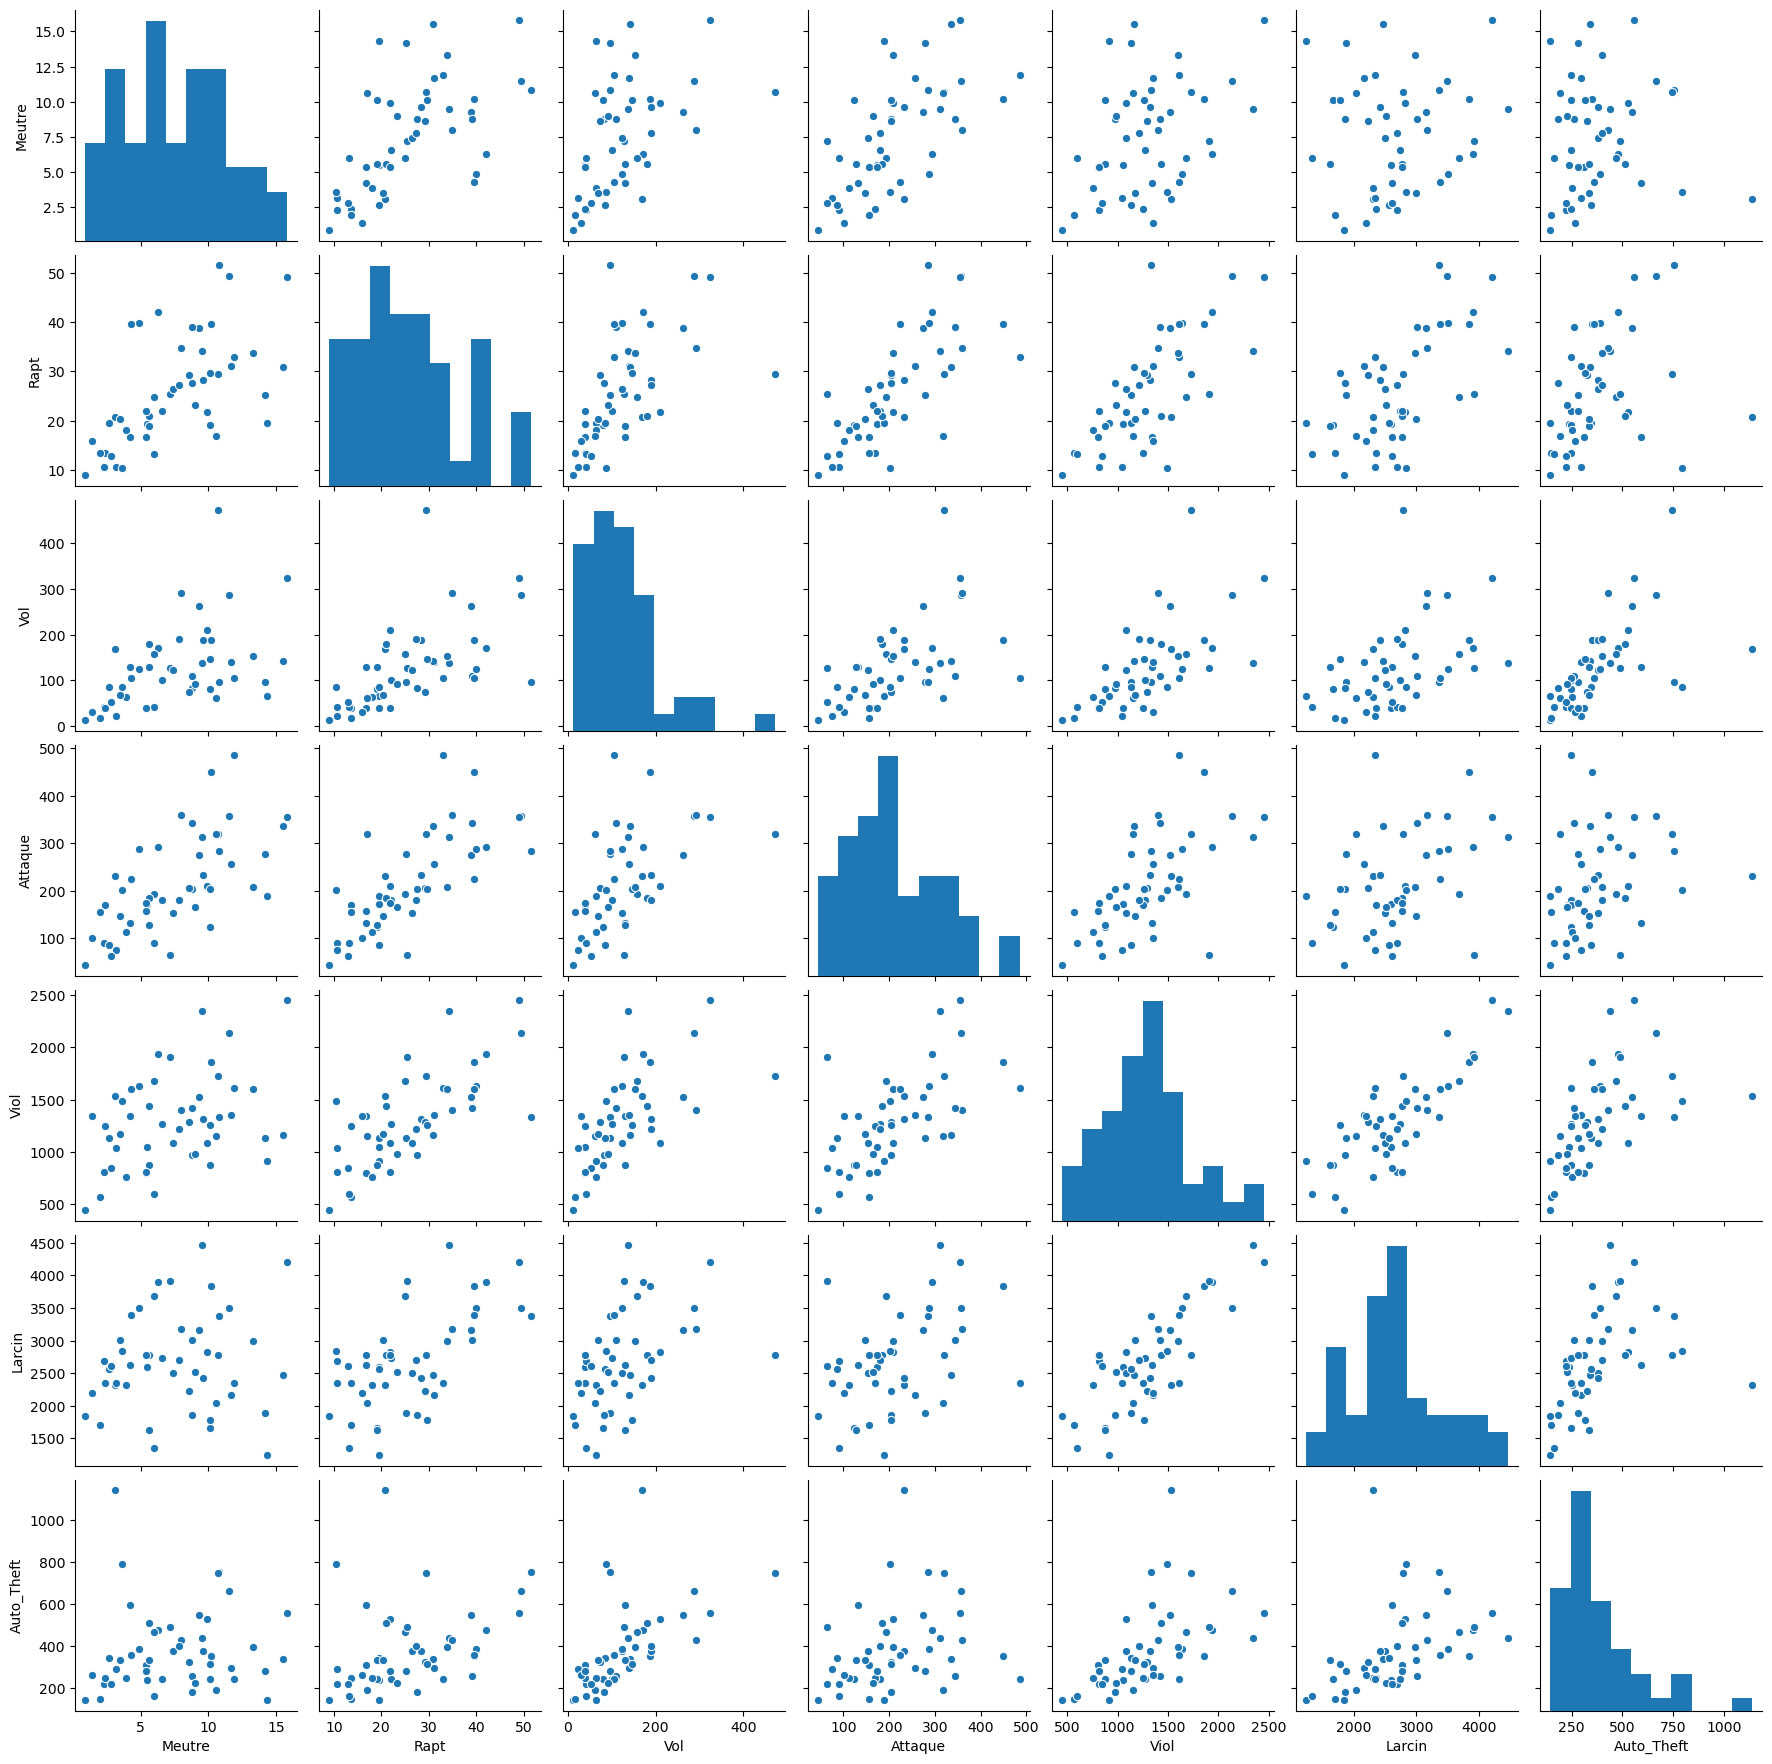

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
correlation=df.corr(method='pearson')
correlation

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Meutre,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
Rapt,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
Vol,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
Attaque,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
Viol,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
Larcin,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
Auto_Theft,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


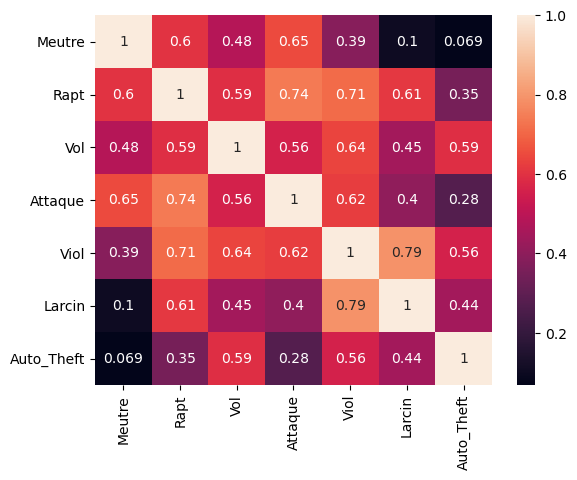

In [19]:
sns.heatmap(correlation, annot=True)
plt.show()

In [61]:
#préparer les labels 
X=["Meutre","Rapt","Vol","Attaque","Viol","Larcin","Auto_Theft"]
cols=df.columns
X=df[cols[1:]].values

In [62]:
scaler = StandardScaler()
x_scaler=scaler.fit_transform(X)

In [67]:
pca=PCA(n_components=None)
x_pca=pca.fit(x_scaler)
#x_pca=pca.fit_transformer(x_scaler)
print(x_pca.explained_variance_ratio_)
#somme des 2 premiéres variables est 0.76

[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]


In [68]:
#sns.scatterplot(x_pca[:,0],x_pca[:,1])

TypeError: 'PCA' object is not subscriptable

In [69]:
plt.scatter(x_pca[0,:],x_pca[:,1])
for label,x,y in zip(labels),x_pca[:,0],x_pca[:,1]:
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

TypeError: 'PCA' object is not subscriptable

In [81]:
from sklearn.cluster import KMeans
wcss=list()
for k in range(1,11):
    Knmeans=KMeans(n_clusters=k,init='k-means++') #choix des centroides à l'état initial
    Knmeans.fit(x_scaler)
    wcss.append( Knmeans.inertia_)
wcss

[350.0,
 211.2939922146492,
 171.94906451995365,
 138.0245848650298,
 121.2862406038554,
 108.39330615514852,
 97.88479741108152,
 89.22899163609112,
 78.55741418677604,
 70.74159354037258]

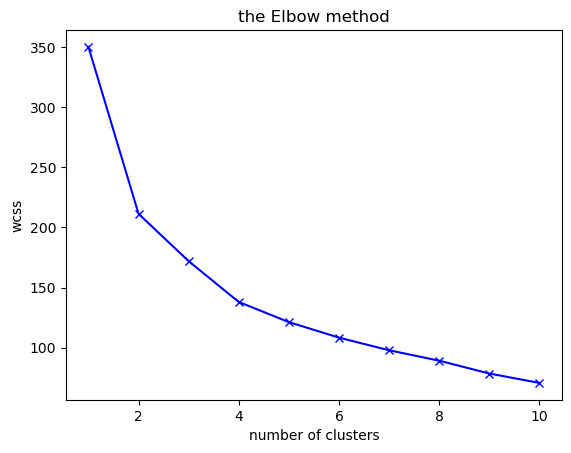

In [82]:
plt.plot(range(1,11),wcss,'bx-') #tracer le méthode elbow
plt.title('the Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [83]:
wcss=list()
Knmeans=KMeans(n_clusters=4,init='k-means++') #choix des centroides à l'état initial
Knmeans.fit(x_scaler)
wcss.append( Knmeans.inertia_)
wcss

[138.19321093188398]

In [99]:
y_Kmeans=Knmeans.labels_
y_Kmeans
L0=list()
L1=list()
L2=list()
L3=list()
for i in range(len(y_Kmeans)):
    if y_Kmeans[i]==0 :
        L0.append(i)
    if y_Kmeans[i]==1 :
        L1.append(i)
    if y_Kmeans[i]==2 :
        L2.append(i)
    if y_Kmeans[i]==3 :
        L3.append(i)
print(L0,L1,L2,L3)

[1, 2, 4, 5, 8, 19, 21, 27, 31] [0, 3, 9, 12, 13, 15, 16, 17, 23, 24, 30, 32, 34, 35, 39, 41, 42, 45] [11, 14, 18, 22, 25, 26, 28, 33, 37, 40, 43, 44, 47, 48, 49] [6, 7, 10, 20, 29, 36, 38, 46]


In [94]:
df.head(50)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,Colorado,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,Connecticut,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,Delaware,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,Florida,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,Georgia,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


### Cluster visualization :

In [ ]:
plt.scatter(x_pca[y-kmeans==0,0],x_pca[y_kmeans==0,1],c="red",label='cluster0')
#do 3 more times (once for each cluster)
plt.scatter(x_pca[0,:],x_pca[:,1])
for label,x,y in zip(labels),x_pca[:,0],x_pca[:,1]:
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title("clustering with x")
plt.show()

#comparer x_scaler ,x_pca , x <br>
#HC<br>
#NMF<br>
#DR<br>
#SVD<br>
#repartition decision Tree <br>
#dendro<br>

<br>
----list of algorithms-----<br>
K-means clustering<br>
KNN (k-nearest neighbors)<br>
Hierarchal clustering<br>
Anomaly detection
Neural Networks<br>
Principle Component Analysis<br>
Independent Component Analysis<br>
Apriori algorithm<br>
Singular value decomposition<br>